In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob
import astroalign as aa
from astropy.io import fits
from matplotlib.colors import LogNorm
from astroscrappy import detect_cosmics as lacosmic
# this is necessary because the version in CCDPROC is calling the wrong arguments. 

Pour plus d'informations sur la combinaison d'images avec la bibliothèque FITS, consultez ici : [https://learn.astropy.org/FITS-images.html](https://learn.astropy.org/FITS-images.html)

Pour plus d'informations sur l'alignement des images, consultez les pages d'astro-align ici :  
[https://astroalign.readthedocs.io/en/latest/tutorial.html](https://astroalign.readthedocs.io/en/latest/tutorial.html)

Ce script de démonstration aligne quatre images, les empile et génère un fichier empilé. Vous aurez également besoin de la bibliothèque CCDproc pour éliminer les rayons cosmiques (les rayons cosmiques peuvent poser des problèmes d'alignement). Les images doivent être prétraitées.

**Note :** Le script *ne fonctionnera pas* pour des décalages très importants entre les images.



In [41]:
data_directory = '/poubelles/broque1NS/tmp/hjmcc/processed/'


In [42]:
image_list = glob.glob(os.path.join(data_directory,'M81*fits'))


In [43]:
image_list

['/poubelles/broque1NS/tmp/hjmcc/processed/M81-0002r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0001r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0003r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0004r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0005r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0006r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0007r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0008r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0009r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0010r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0011r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0012r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0013r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0014r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0015r_pr.fits',
 '/poubelles/broque1NS/tmp/hjmcc/processed/M81-0016r_pr

Open the first extension of the first image  in the list with fitsio and use lacosmic to remove cosmic rays. 


'Target' image is reference image to which all the images are aligned. 

In [44]:
#M57 Red image (already processed) image is target 
target_image = os.path.join(data_directory,'M81-0029r_pr.fits')
target=fits.open(target_image)[0].data
mask,target=lacosmic(target)

In [45]:
#f = aplpy.FITSFigure(target)
#f.show_grayscale()
#plt.show()

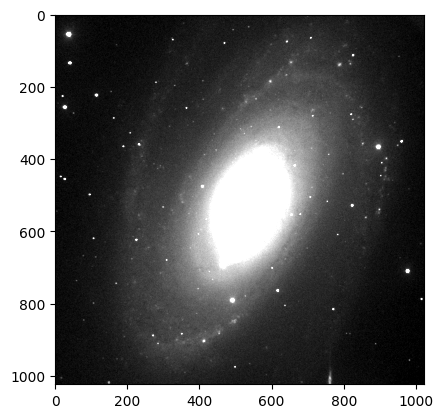

In [46]:
#plt.imshow(target, cmap='gray')
plt.imshow(target, cmap='gray', vmin=np.percentile(target, 5), vmax=np.percentile(target, 95))


In [47]:
image_concat = [target]
for image in image_list:
    print ("registering image ",image)
    source = fits.open(image)[0].data
    mask,source = lacosmic(source)
    registered_image, footprint = aa.register(source,target, detection_sigma=3)
    image_concat.append(registered_image)

registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0002r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0001r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0003r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0004r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0005r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0006r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0007r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0008r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0009r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0010r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0011r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-0012r_pr.fits
registering image  /poubelles/broque1NS/tmp/hjmcc/processed/M81-

Go through the list of files, register them, and add them together. 

In [48]:
final_image = np.median(image_concat, axis=0)

Make a median of all the  images. 

*Note higher signal-to-noise (more faint stars) in combined image. 

In [49]:
outfile = os.path.join(output_dir,'final_M57_Green_2021.fits')
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

Final Image dtype: float32
Target dtype: float32


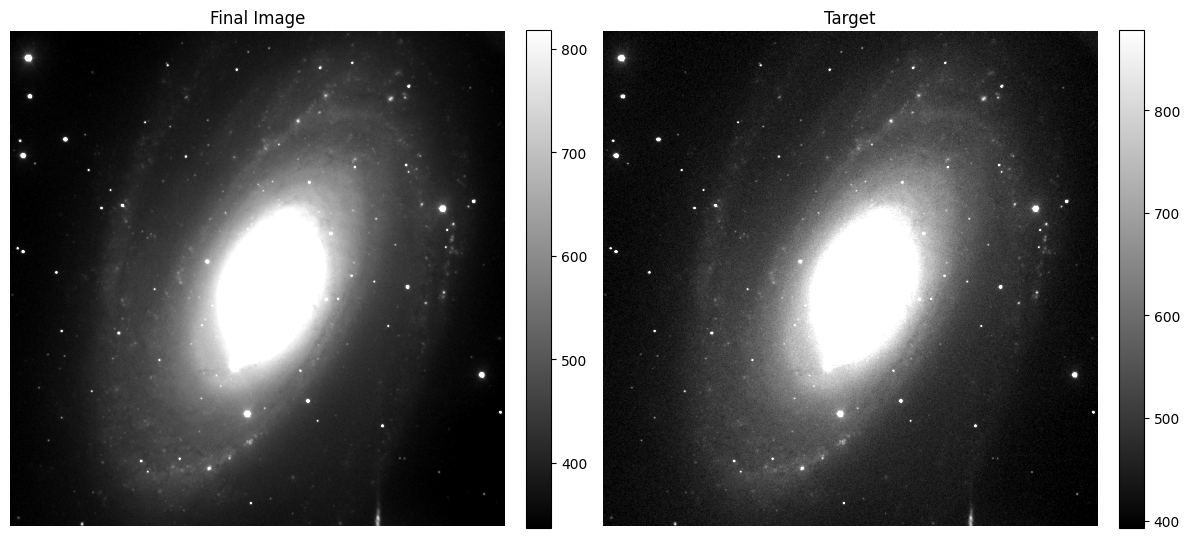

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Verify data types
print("Final Image dtype:", final_image.dtype)
print("Target dtype:", target.dtype)

# Optionally, check for NaNs or infinite values
for name, img in zip(['Final Image', 'Target'], [final_image, target]):
    if not np.isfinite(img).all():
        print(f"Warning: {name} contains non-finite values.")

# Replace NaNs or infinite values if necessary
final_image = np.nan_to_num(final_image, nan=0.0, posinf=0.0, neginf=0.0)
target = np.nan_to_num(target, nan=0.0, posinf=0.0, neginf=0.0)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define a list of images and their titles
images = [final_image, target]
titles = ["Final Image", "Target"]

# Plot each image with percentile-based scaling
for ax, img, title in zip(axes, images, titles):
    vmin = np.percentile(img, 5)
    vmax = np.percentile(img, 95)
    im = ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis("off")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Optional: Add colorbars

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
